## 2.2 Generalized Linear Models 
- GLMs make assumptions of relationship between dependent and independent variables 
- Hypothesis orientation to model building, in validating linear relationship exists , and is tested after
  model training 
- Theoretical aspects for Linear Regression, and algorithm are discussed here - 
  - http://localhost:8888/notebooks/Documents/DS/Supervised%20Learning/SL201/Linear%20Regression/Linear_Regression_latest.ipynb

#### Key Aspects :
1. Strong assumptions about data relationships 
  - Linearity
  - No specification bias 
  - Homoscedasticity : This is adjusted for in GLMs where target has other than normal distribution
  - Multicolinearity  
  - Normality of Errors 
  - Autocorrelation of Errors 
2. Loss Function - Mean Residual Sum of Squares/ Mean RSS
3. Model Complexity
  - There is no mechanism to control model complexity(without regularization), something like k in kNN
  - Linear models can become complex, by increase in number of features, feature forms, interactions 
  - In presence of large number of features, a measure of complexity often is the size of coefficients, 
    which we will see later, is used to control complexity. 
4. Use of Linear regression in sci-kit learn 
5. Comparison with kNN regression

In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib notebook
plt.style.use('bmh')

In [7]:

X, y = make_regression(n_samples= 100, n_features= 1, n_informative= 1, 
                n_targets= 1, bias = 50, noise = 30, random_state= 123)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 123)
print("Shapes of X_train = {0}, X_test = {1}, y_train = {2}, y_test = {3}"  
       .format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

linear_model = LinearRegression(fit_intercept= True)
linear_model.fit(X_train, y_train)
print('weights = {0:}, intercept = {1}'.format(linear_model.coef_, linear_model.intercept_))
scored_train_linear = linear_model.predict(X_train)
scored_test_linear = linear_model.predict(X_test)
lm_rsq_train = linear_model.score(X_train,y_train)
lm_rsq_test = linear_model.score(X_test,y_test)

# knn model
k = 5
knn_model = KNeighborsRegressor(n_neighbors = k)
knn_model.fit(X_train, y_train)
scored_train_knn = knn_model.predict(X_train)
scored_test_knn = knn_model.predict(X_test)
knn_rsq_train = knn_model.score(X_train, y_train)
knn_rsq_test = knn_model.score(X_test, y_test)

Shapes of X_train = (80, 1), X_test = (20, 1), y_train = (80,), y_test = (20,)
weights = [ 33.930188], intercept = 49.61446610803708


<IPython.core.display.Javascript object>


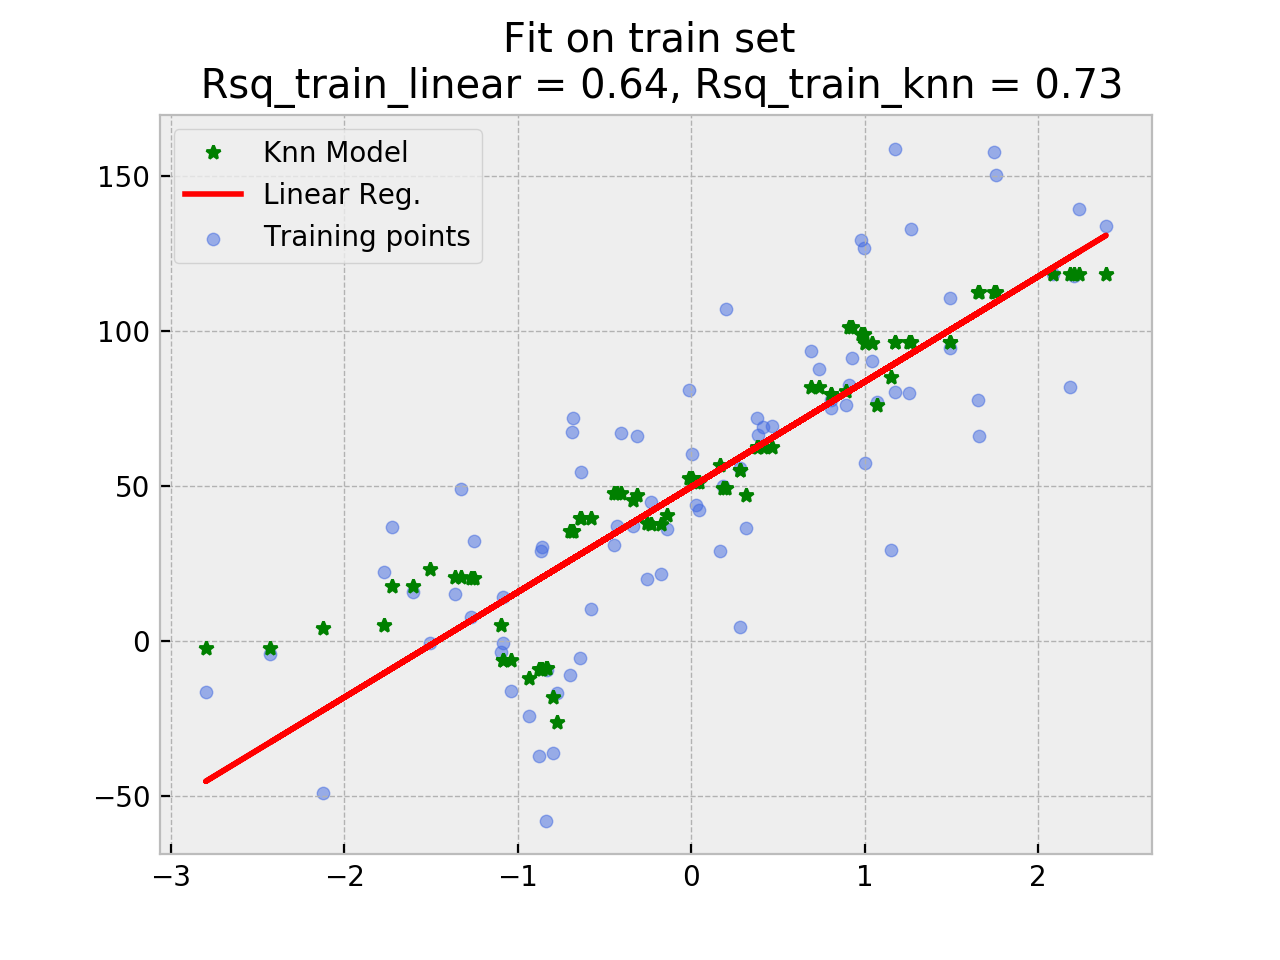

In [10]:
plt.figure()
plt.scatter(X_train, y_train,c = 'royalblue', marker = 'o', alpha = 0.5, s = 20, label = 'Training points')
plt.plot(X_train,scored_train_knn, 'g*', label = 'Knn Model',markersize = 5)
plt.plot(X_train, scored_train_linear,'r-', label = 'Linear Reg.')
plt.title('Fit on train set \n Rsq_train_linear = {0:.2f}, Rsq_train_knn = {1:.2f}'
          .format(lm_rsq_train,knn_rsq_train))
plt.legend()

<IPython.core.display.Javascript object>


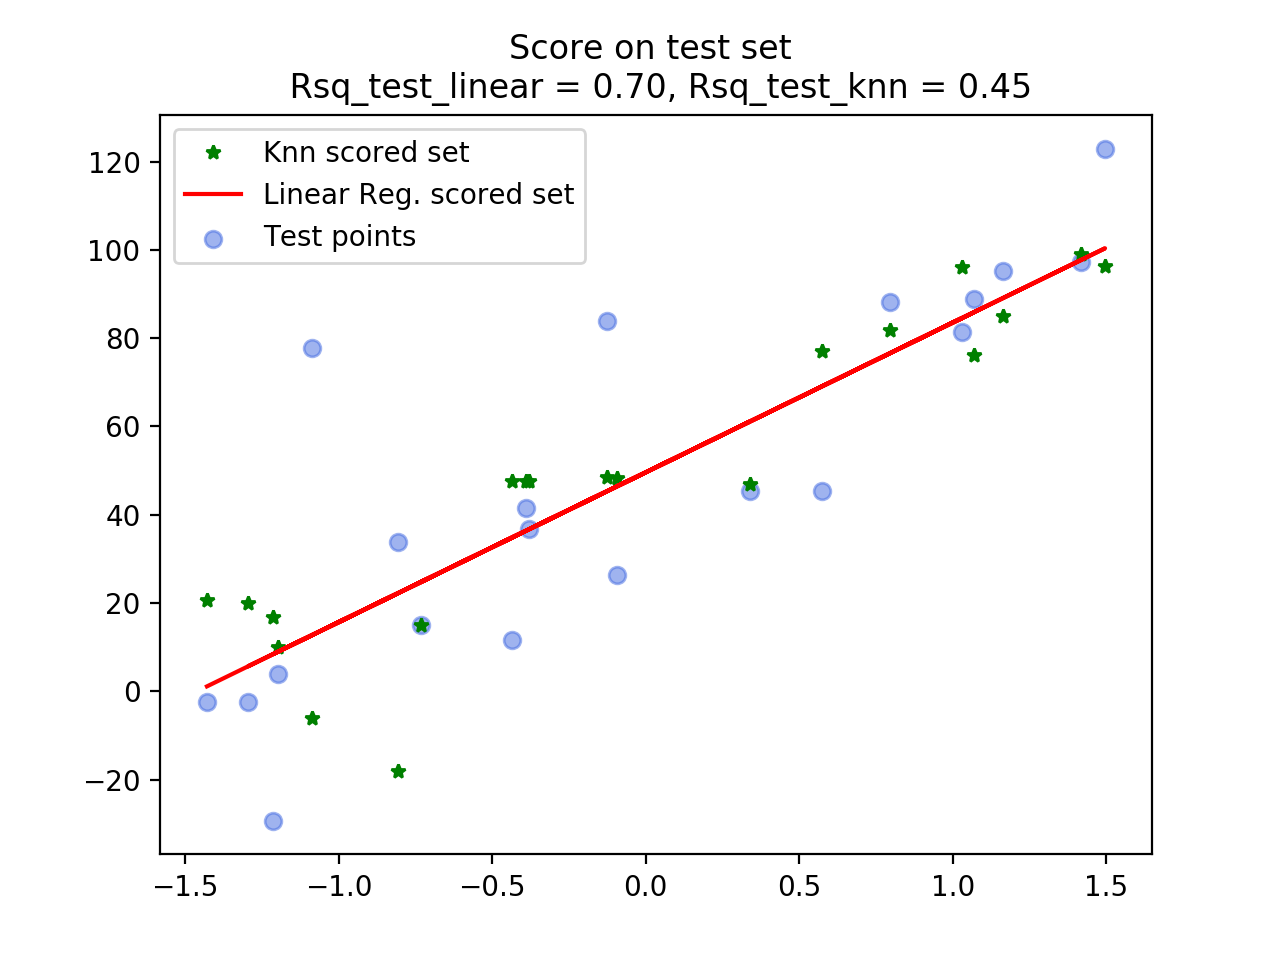

In [22]:
plt.figure()
plt.scatter(X_test, y_test,c = 'royalblue', marker = 'o', alpha = 0.5, label = 'Test points')
plt.plot(X_test,scored_test_knn, 'g*', markersize = 5,label = 'Knn scored set')
plt.plot(X_test, scored_test_linear,'r-',label = 'Linear Reg. scored set')
plt.title('Score on test set \n Rsq_test_linear = {0:.2f}, Rsq_test_knn = {1:.2f}'
          .format(lm_rsq_test,knn_rsq_test))
plt.legend()

##### Comparison of Linear Regression and kNN regression

|kNN|Linear Regression
|:-|:-|
|1.Simple to understand, no assumptions are made on distribution of data|1. Strong assumptions on relationships in data, assumptions require validation|
|2.Can learn non-linear decision boundaries|2. Requires variables to be transformed to address non-linear relationships|
|3. Can be sensitive to changes in data,  generally have low bias (can learn non-linear relationships)|3. Stable to changes in data, but generally have high bias (cause of linear structure)|

### 3.  Ridge Regression
- 3.1 Cost Function : L2 penalty in cost function, scoring remains same
- 3.2 Need for feature scaling
  - type of scaling depends on data, learning task (class/reg) and algorithm (more later)
- 3.3 Effect of regularization on 
    - Size of coefficients 
    - Interpretability of regression
- 3.4 Finding standard error of Betas in regularized regression 
- 3.5 Show how regularization performs better than unregularized regression  
- 3.6 How the optimization problem is solved in sci-kit learn through different solvers 
  - When to use which solver

#### 3.1 Ridge Regression. 
Cost function = f($\beta$) = 
$\Sigma_{i=1}^m[y^{(i)} - (\widehat{\beta_0} + \widehat{\beta_1}*x^{(i)}_1 + ... + \widehat{\beta_n}*x^{(i)}_n)]^2 + 
\alpha * \Sigma_{j=1}^n\beta^2_j$ 

- **Notice bias term is not used in regularization term**

- **Alpha** 
  - Alpha controls the extent of regularization, is > 0 
  - It becomes a hyperparameter, that choice of alpha affects the parameters of the model , and hence 
    it is tuned using a validation dataset / cross validation 
  - Higher alpha means more regularization  

#### How does penalty term avoid overfitting? 
  - Empirical observation suggested, that important variables in linear regression get large coefficients which cause
    overfitting.
    First half of the cost function tries to learn that way by decreasing RSS, but second half penalizes 
    increase in coefficient size. 
  - This counter-effect  means that coefficient size of important variables is limited, and so model is able 
    to generalize well on newer data sets
#### Once the coefficients and intercept is learned, predictions are generated using them as in case of unregularized regression  

#### 3.2 Feature Scaling 
- The features in the regression can be on different scales. **Remember the learned coefficients values depend
  on the scale of features used** 
- when using ridge, we are adding all squared weights together by giving them same weight 1, it turns out well
  if we scale each feature to a common scale 
- **Feature scaling is helpful in many aspects and used in many algorithms as pre-procssing step**
  - Esp. parametric models : Linear, Logistic regression, neural nets, svm, kNN
  - Faster convergence of learning algorithm 
  - Fair and easy specification of weights without any weighting
- Many options available for type of scaling, MinMax, z etc.   
- **Use same scaler on test set, do not fit the scaler again with test data, results in data leakage!, think of
  it as you are not supposed to know about test data during training, but you will end up using extreme values
  of test data set in scaling, this might result in getting very good results on test set. Doing this in kaggle might
  be desirable to exploit the leakage :D**  
- Downside - interpretation is affected, meaning the regression prediction would be different with feature scaling
  than without it

In [13]:
def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    crime = pd.read_table('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
    crime = crime.iloc[:,columns_to_keep].dropna()

    X_crime = crime.iloc[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)
X_crime, y_crime = load_crime_dataset()
print(X_crime.shape, y_crime.shape)

(1994, 88) (1994,)


#### Effect of feature scaling using two features - MinMaxScaler 
x = (x - min(x))/ range(x)

In [14]:
from sklearn.preprocessing import MinMaxScaler
sample = X_crime.loc[:,['agePct12t21', 'agePct12t29']]
scaler = MinMaxScaler() 
scaler.fit(sample) # Compute the minimum and maximum to be used for later scaling
print(scaler)
sample_tfd = scaler.transform(sample) # transformation

MinMaxScaler(copy=True, feature_range=(0, 1))


<IPython.core.display.Javascript object>


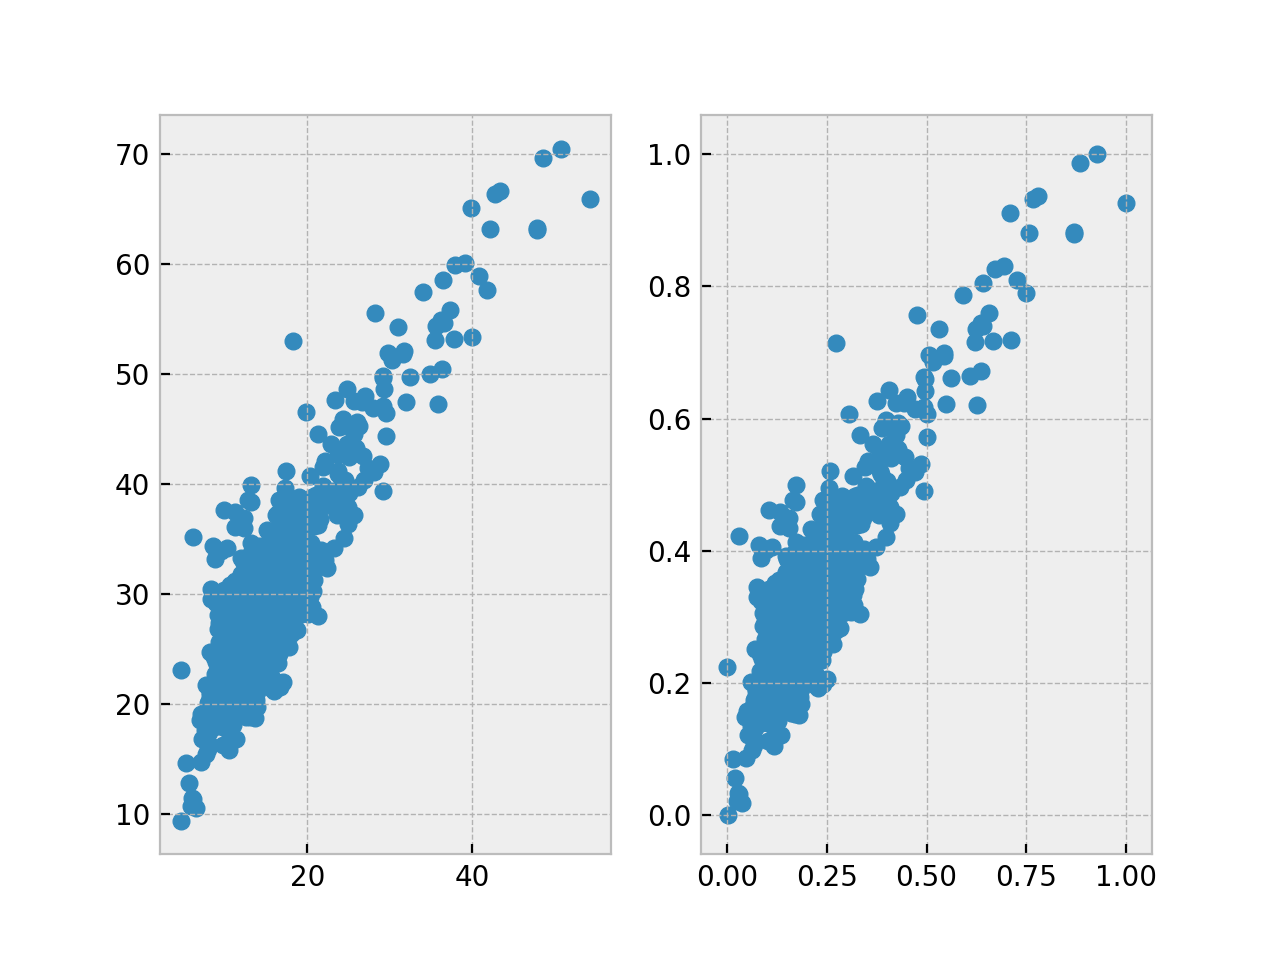

In [15]:
plt.figure()
plt.subplot(1,2,1)
plt.scatter(X_crime['agePct12t21'], X_crime['agePct12t29'])
plt.subplot(1,2,2)
plt.scatter(sample_tfd[:,0], sample_tfd[:,1])

#### 3.3 Ridge Regression (with normalization) , effect on coefficient size and interpretability

- How do coefficients change with alpha (extent of regularization). 
  - Increase in regularization, decreases the coefficient size generally
- How do coefficient compare with unregularized regression
  - Ridge coefficients are smaller ( see bar chart)
- See the difference in predictions, how is interpretability affected 
  - Scatter on test set shows prediction differ, there is no pattern of consistently being high or low though
  - Interpretability is affectd, cause you cannot make reasoning that a coefficient represent the effect of unit   
    change in the variable, keeping all others same. However, you can compare coefficient sizes to gauge importance.
    Interpretability is affected because we use an altered cost function.

In [51]:
# Linear model, not regularized
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,test_size = 0.2,random_state = 123)
print("Shapes of X_train = {0}, X_test = {1}, y_train = {2}, y_test = {3}"  
       .format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

scaler = MinMaxScaler()
X_train_tfd = scaler.fit_transform(X_train)
X_test_tfd = scaler.transform(X_test)

linear_model = LinearRegression(fit_intercept= True)
linear_model.fit(X_train_tfd, y_train)
#print('weights = {0}, intercept = {1}'.format(linear_model.coef_, linear_model.intercept_))
print('Non zero weights = {}'.format(sum(linear_model.coef_ != 0)))
print('Training Time in ms: {}'.format((end-start)*1000))
#scored_train_linear = linear_model.predict(X_train)
scored_test_linear = linear_model.predict(X_test_tfd)
lm_rsq_train = linear_model.score(X_train_tfd,y_train)
lm_rsq_test = linear_model.score(X_test_tfd,y_test)
print('Linear model: Rsq_train = {0:.3f}, Rsq_test = {1:.3f}'
      .format(lm_rsq_train,lm_rsq_test))

Shapes of X_train = (1595, 88), X_test = (399, 88), y_train = (1595,), y_test = (399,)
Non zero weights = 88
Training Time in ms: 12.449979782104492
Linear model: Rsq_train = 0.680, Rsq_test = 0.588


[0.0001, 0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

In [54]:
# Regularized
from sklearn.linear_model import Ridge
alpha_grid =  [10**(-1*i) for i in range(5)]
alpha_grid += [1.5,2,2.5,3,3.5,4,4.5,5]
alpha_grid = sorted(alpha_grid)

train_error = []
test_error = []
for alpha in alpha_grid:
    linear_model_ridge = Ridge(random_state = 123, alpha = alpha)
    #print(linear_model_ridge)
    linear_model_ridge.fit(X_train_tfd, y_train)
    print('Non zero weights = {}'.format(sum(linear_model_ridge.coef_ != 0)))
    print('Training Iterations = {}'.format(linear_model_ridge.n_iter_))
    ridge_rsq_train = linear_model_ridge.score(X_train_tfd,y_train)
    ridge_rsq_test = linear_model_ridge.score(X_test_tfd,y_test)
    train_error.append(ridge_rsq_train)
    test_error.append(ridge_rsq_test)


Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None
Non zero weights = 88
Training Iterations = None


In [55]:
alpha_grid

[1, 0.1, 0.01, 0.001, 0.0001, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

##### Ridge 
- Can use 5 potential solvers, setting is auto to choose
- Setting for number of iterations as well, because the objective may not be convex

In [56]:
X_tfd = np.append(X_train_tfd,X_test_tfd, axis = 0)
y = np.append(y_train, y_test, axis = 0)

In [50]:
X_tfd.shape

(1994, 88)

In [59]:
print(alpha_grid,'\n', train_error)

[1, 0.1, 0.01, 0.001, 0.0001, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5] 
 [0.66310515413723925, 0.67461010989823356, 0.67930004694275281, 0.67981528853017958, 0.67982867933244873, 0.65975750071409434, 0.6570005651985662, 0.65460740481304858, 0.65246837300169047, 0.65052098937354019, 0.64872548786715289, 0.64705451150671633, 0.64548815114253888]


<IPython.core.display.Javascript object>


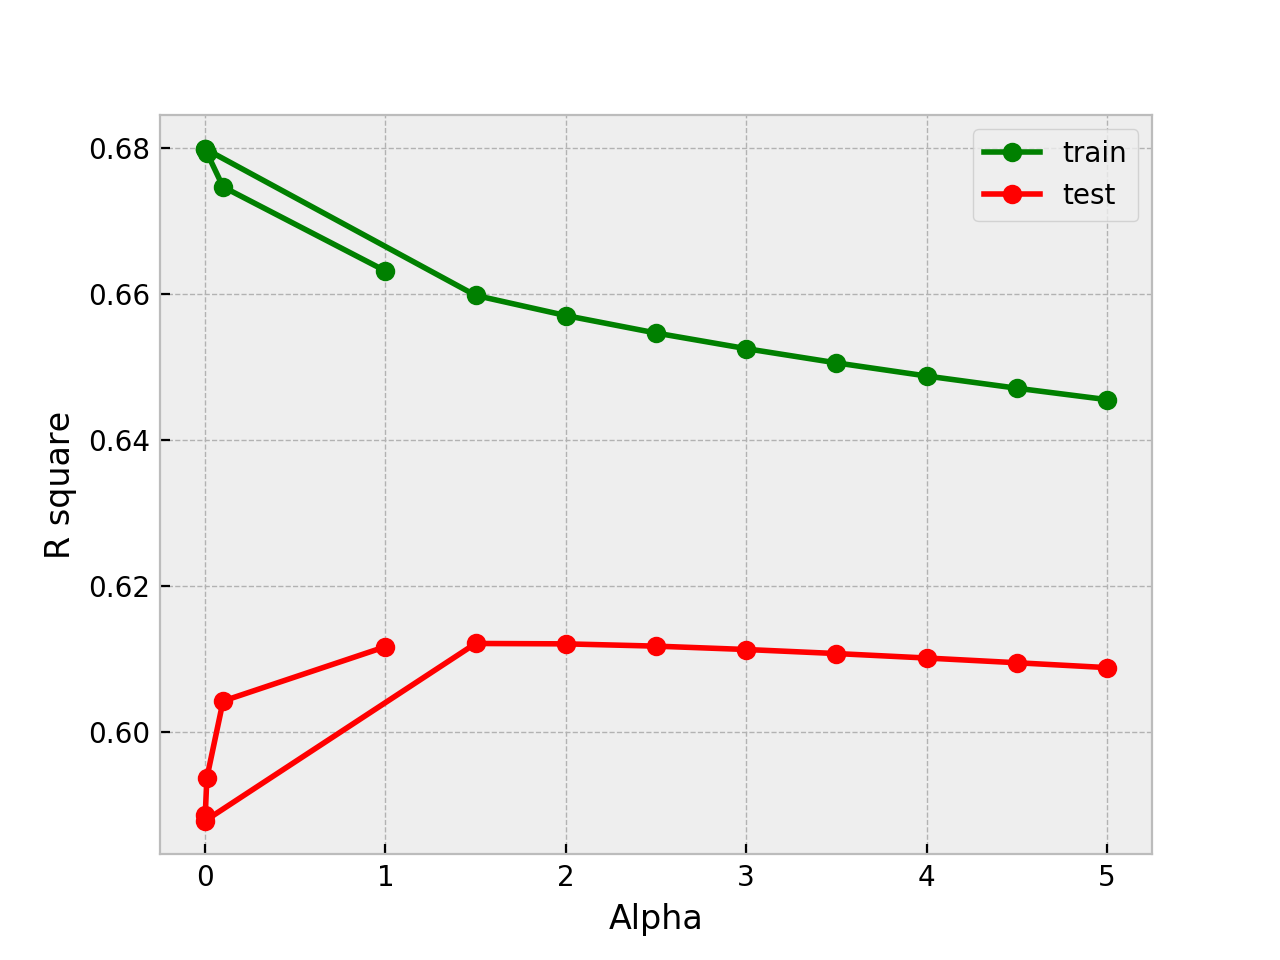

In [57]:
plt.figure() 
plt.plot(alpha_grid, train_error,'go-', label = 'train')
plt.plot(alpha_grid, test_error,'ro-', label = 'test')
plt.xlabel('Alpha')
plt.ylabel('R square')
plt.legend()

<IPython.core.display.Javascript object>


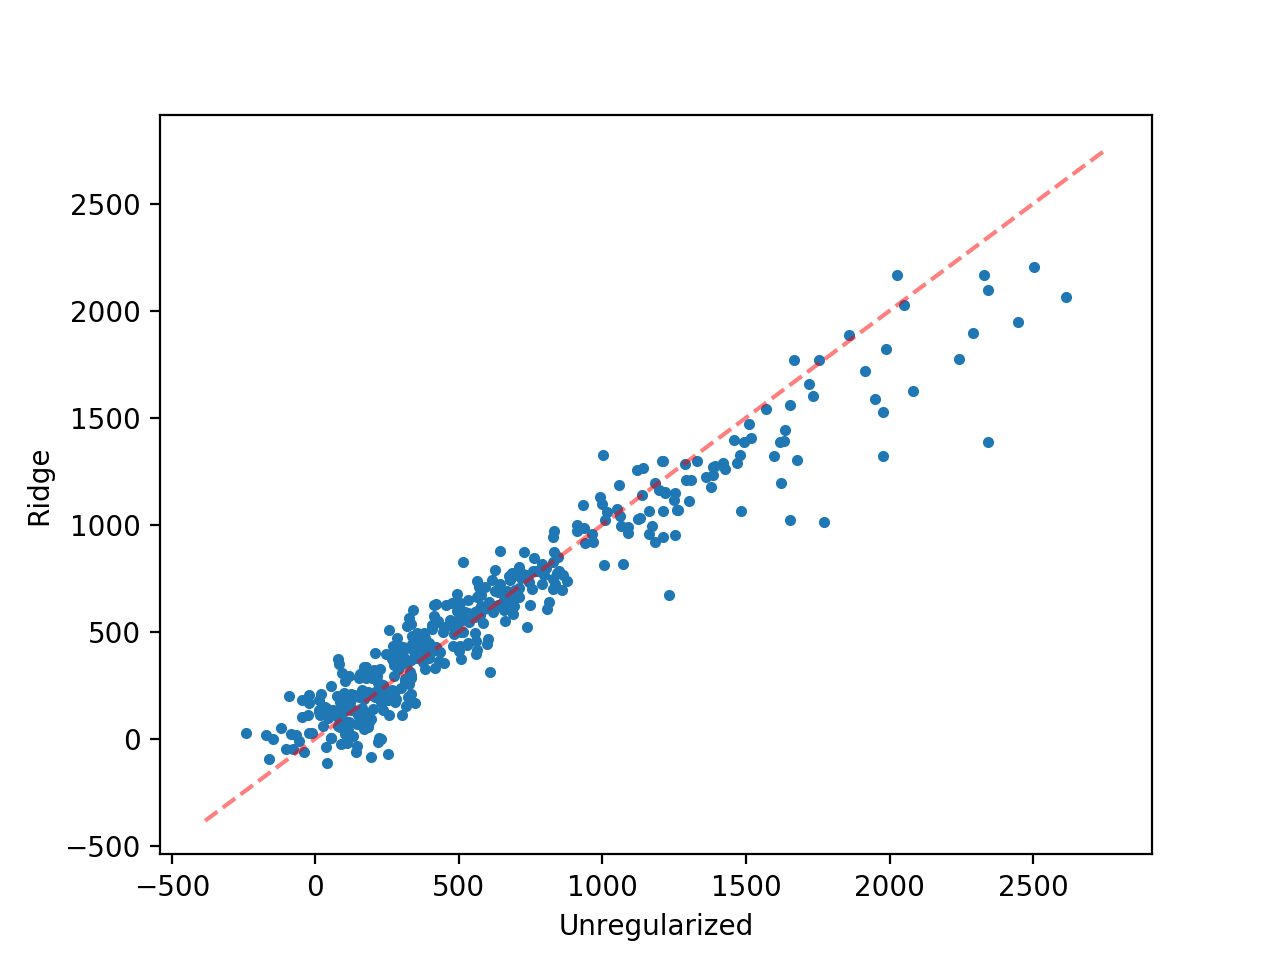

In [40]:
plt.figure()
plt.scatter(scored_test_linear, scored_test_ridge, marker = '.')
plt.xlabel('Unregularized')
plt.ylabel("Ridge")
ax = plt.gca()
mn, mx = ax.get_xlim()
arr = range(int(mn),int(mx),1)
plt.plot(arr,arr,'r--', alpha = 0.5)

### Notice coefficient size in ridge is reduced (not for all variables, for some it increases) but for all 
### where unregularized regression seems to have a large coef. size

<IPython.core.display.Javascript object>


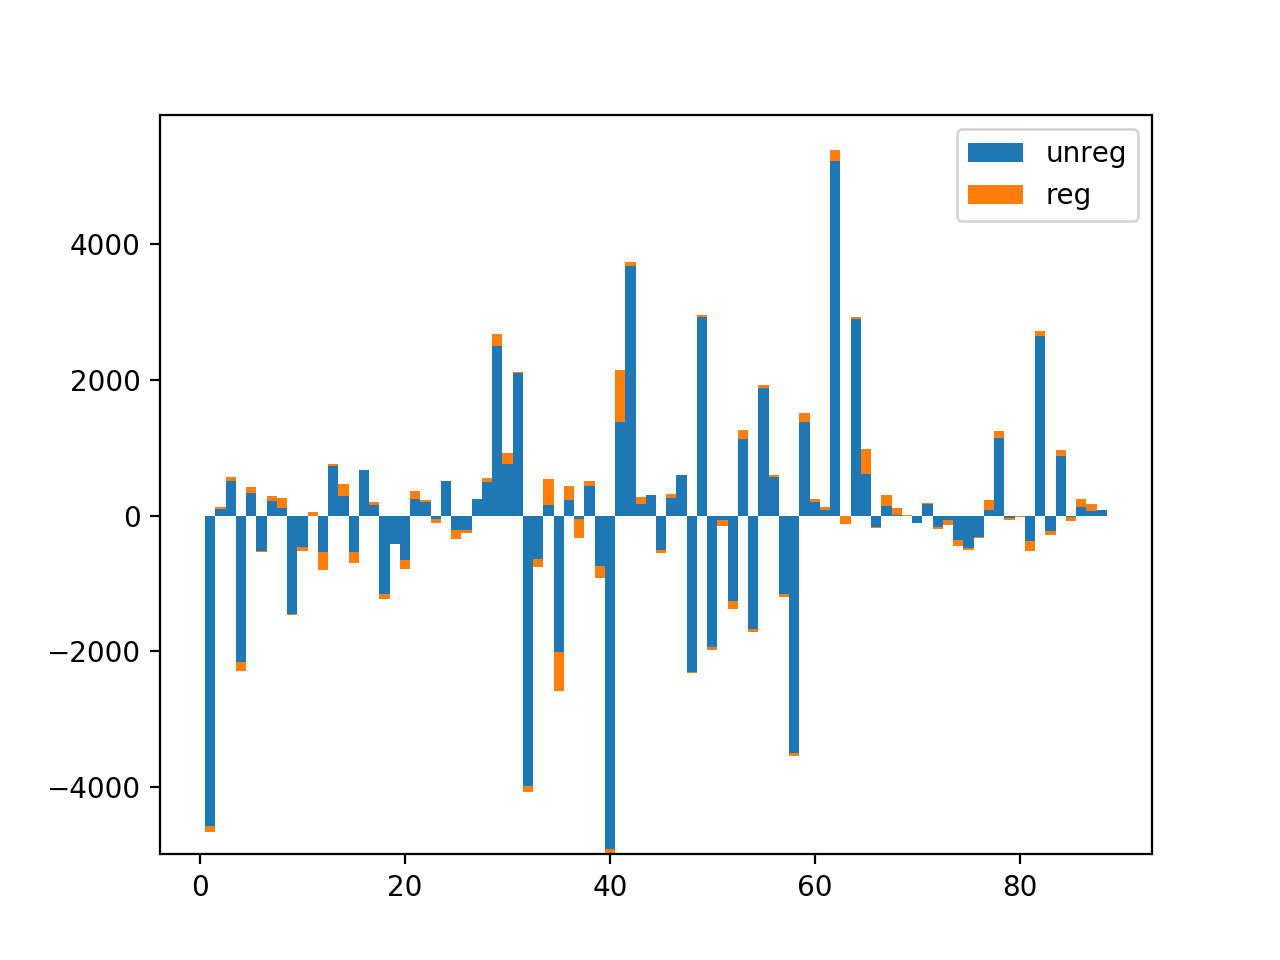

In [63]:
plt.figure()
#len(linear_model_ridge.coef_)
x = list(range(1,89,1))
#x_ = [i+0.5 for i in x]
plt.bar(x = x,height = linear_model.coef_, width = 1, label = 'unreg')
plt.bar(x = x ,height = linear_model_ridge.coef_, width = 1, label = 'reg',bottom = linear_model.coef_)
plt.legend()

#### Ridge Regression (with normalization and without)
- Should not even consider this, because the weighting the betas as same (1) would not be right in the L2
  term

### Regularization is especially useful when m(training samples) < n(features). As the data set size increases effect of regularization in making model generalize well decreases

#### 3.4 Standard error of Betas in Regularized regressions
- Finding standard errors in regression coefficients from ridge/lasso
  - https://stats.stackexchange.com/questions/45449/when-using-glmnet-how-to-report-p-value-significance-to-claim-significance-of-pr
- Finding standard errors from regression 
  - sklearn.Linear Regression() does not give, but class can be easily extended/ or use statsmodels. 
  The solution comes from solving the matrix algebra 
  - The diagonal of np.dot(X,X^T). gives the variance of betas
  - https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression  

#### Lasso Regression  
- Uses an L1 penalty term 
- **L1 penalty term has an effect that it reduces the coefficients of weak variables to 0, unlike ridge, hence serving 
  as a variable selection**
- Alpha is tuneable parameter  

Cost function = f($\beta$) = 
$\Sigma_{i=1}^m[y^{(i)} - (\widehat{\beta_0} + \widehat{\beta_1}*x^{(i)}_1 + ... + \widehat{\beta_n}*x^{(i)}_n)]^2 + 
\alpha * \Sigma_{j=1}^n|\beta_j|$ 



#### Lasso vs Ridge 
- use ridge when several variables ca contribute small-medium effects
- can use lasso when only some variables can conribute medium - large effects

#### Lasso with tuning of alpha using a grid, max_iter

In [51]:
X_train_tfd.shape

(1595, 88)

In [76]:
from sklearn.linear_model import Lasso
alpha = [0.1,0.2, 0.3,0.4,0.5,0.6,0.7,.8,.9,1]
lasso_train_rsq = []
lasso_test_rsq = []
for al in alpha:
    linear_model_lasso = Lasso(random_state = 123, alpha = al)
    #if(al==0.1):
    #    print(linear_model_ridge)
    #start = time.time()
    linear_model_lasso.fit(X_train_tfd, y_train)
    #end = time.time()
    #print('weights = {0}, intercept = {1}'.format(linear_model_lasso.coef_, linear_model_lasso.intercept_))
    print('Non zero weights = {}'.format(sum(linear_model_lasso.coef_ != 0)))
    #print('Training Time in ms: {}'.format((end-start)*1000))
    #print('Training Iterations = {}'.format(linear_model_ridge.n_iter_))

    #scored_train_linear = linear_model.predict(X_train)
    #scored_test_ridge = linear_model_ridge.predict(X_test_tfd)
    lasso_rsq_train = linear_model_lasso.score(X_train_tfd,y_train)
    lasso_rsq_test = linear_model_lasso.score(X_test_tfd,y_test)
    lasso_train_rsq.append(lasso_rsq_train)
    lasso_test_rsq.append(lasso_rsq_test)

for al,train_score,test_score in zip(alpha, lasso_train_rsq,lasso_test_rsq):
    print('Alpha = {0},Train Rsq = {1:.3f}, Test Rsq = {2:.3f}'.format(al,train_score,test_score))

Non zero weights = 65
Non zero weights = 49
Non zero weights = 40
Non zero weights = 38
Non zero weights = 35
Non zero weights = 30
Non zero weights = 28
Non zero weights = 25
Non zero weights = 25
Non zero weights = 25
Alpha = 0.1,Train Rsq = 0.670, Test Rsq = 0.611
Alpha = 0.2,Train Rsq = 0.663, Test Rsq = 0.613
Alpha = 0.3,Train Rsq = 0.659, Test Rsq = 0.614
Alpha = 0.4,Train Rsq = 0.655, Test Rsq = 0.615
Alpha = 0.5,Train Rsq = 0.652, Test Rsq = 0.616
Alpha = 0.6,Train Rsq = 0.649, Test Rsq = 0.617
Alpha = 0.7,Train Rsq = 0.647, Test Rsq = 0.616
Alpha = 0.8,Train Rsq = 0.645, Test Rsq = 0.615
Alpha = 0.9,Train Rsq = 0.644, Test Rsq = 0.613
Alpha = 1,Train Rsq = 0.643, Test Rsq = 0.611


<IPython.core.display.Javascript object>


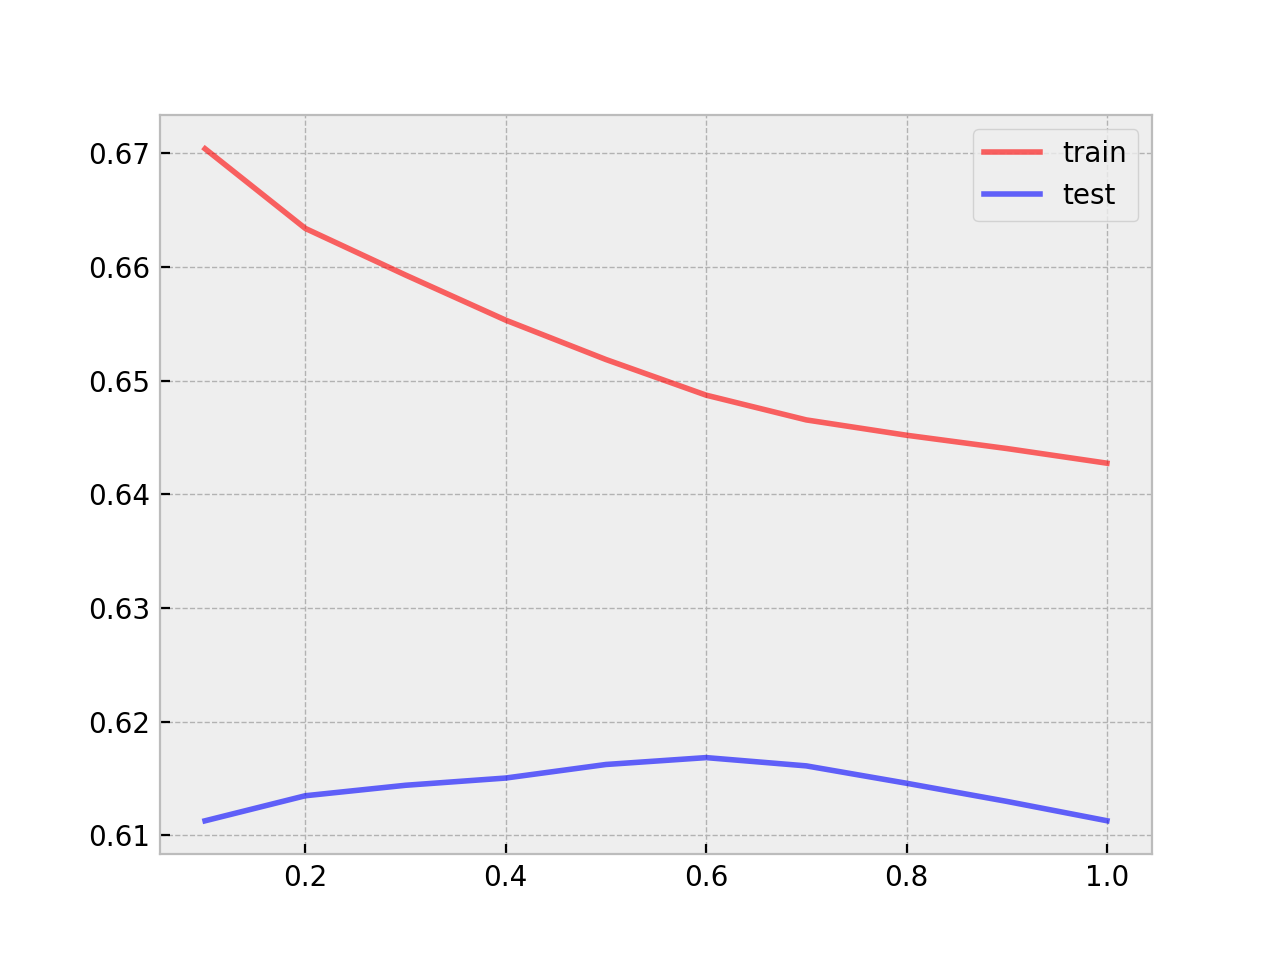

In [77]:
plt.figure()
plt.plot(np.array(alpha), np.array(lasso_train_rsq), 'r-',label = 'train',alpha = 0.6)
plt.plot(alpha, lasso_test_rsq,'b-' ,label = 'test',alpha = 0.6)
plt.legend()

#### Retrain for alpha = 0.6 on full data set

In [106]:
full_model = Lasso(alpha = 0.6, random_state= 123)
scaler = MinMaxScaler()
X_crime_tfd = scaler.fit_transform(X_crime)
full_model.fit(X_crime_tfd,y_crime)
score = full_model.score(X_crime_tfd, y_crime)
result = pd.DataFrame({'name' : X_crime.columns, 'coef' :full_model.coef_},
             columns = ['name', 'coef']).sort_values(by = 'coef', ascending = False)
result_ = result.loc[result['coef'] !=0,:]

#### Coeff size plotted by sorting, only 28 non zer coefficients

<IPython.core.display.Javascript object>


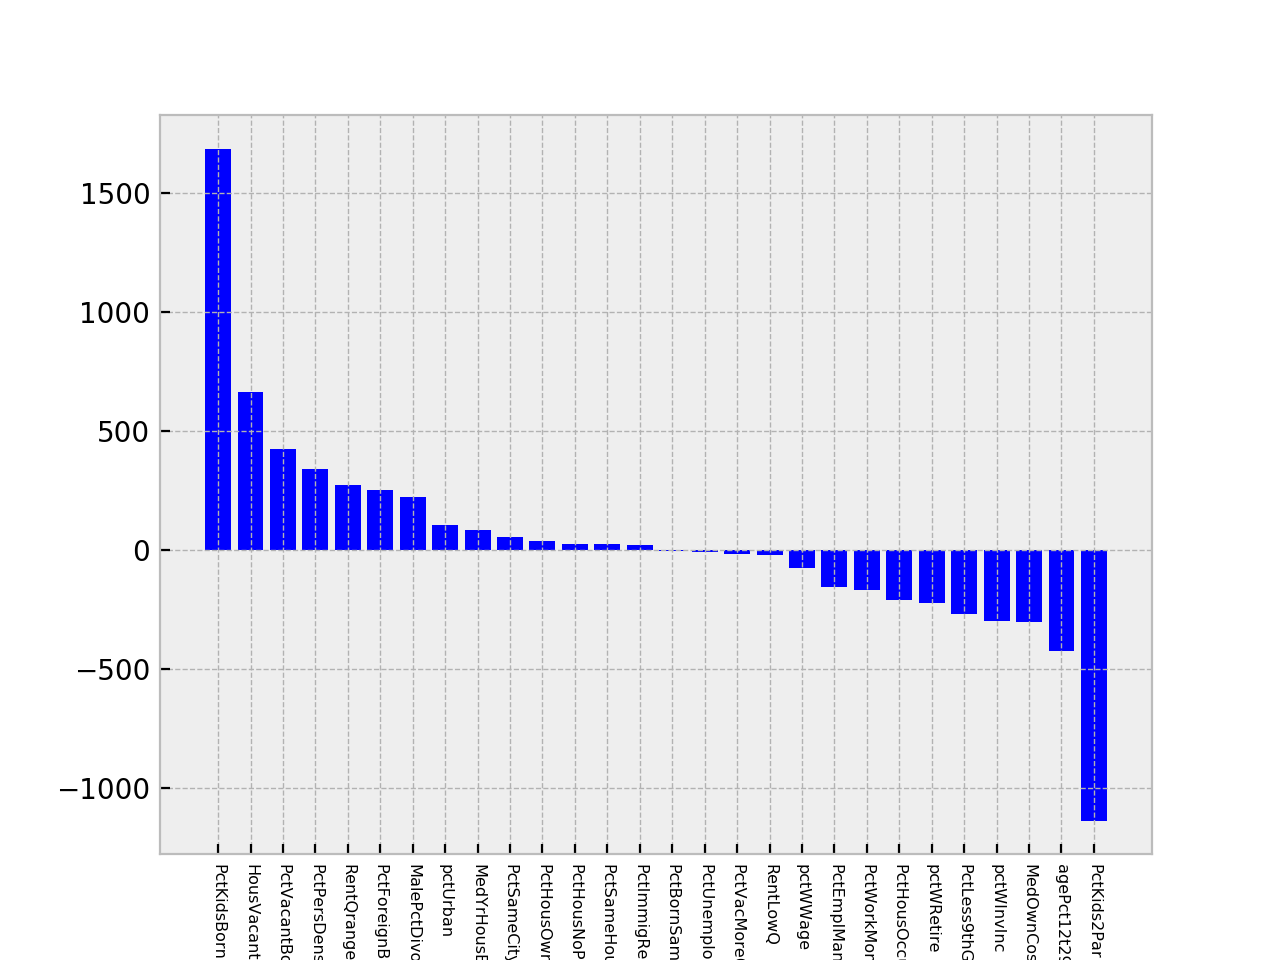

In [127]:
plt.figure()
_ =plt.bar(x = range(len(result_['name'])),
        height = result_['coef'],color = 'blue')
_ =plt.gca().set_xticks(np.arange(len(result_))) # ensures all tick labels appear
_=plt.gca().set_xticklabels(labels = result_['name'], rotation = -90, fontsize = 'xx-small')


#### 4. Polynomial features/ Regression  
**Polynomial features** 
-  Taking the available features and constructing polynomial features from them is creating multiplicative combination of a chosen degree from them.Eg : Features x1 and x2, for degree 2 features can give $x_1^2, x_2^2, x_1x_2$  
**Why Polynomial features** 
- Exploratory analysis can suggest relationship between predictor and predictand is non-linear, like squared or 
  you can hypothesize a multiplicative relationship as appropriate to predict the predictand, and not an additive one.
  **This is often called feature interaction, like $x_1x_2$**.   
  - $Salary = \beta_0 + \beta_1*Age + \beta_2 * Gender$ implies average salary of Either male or female is more than the other irrespective of the age. This may not be tru from the data, you'll be able to check it, which then means you
  should introduce an interaction feature. 
  So, $Salary = \beta_0 + \beta_1*Age + \beta_2 * Gender + \beta_3 * Gender * Age$  would be appropriate 
  - Polynomial features still allow you to fit a linear regression, as it is linear in terms of Beta's, but 
  allow you to capture non-linear relationship between predictor and predictand, weighted linearly by parameters.   
  - Polynomial features allow to build more complex features, which can especially come handy in classification tasks,
  kernelized support vectors are an example of this. 
  - Other non-linear transformations are techincally called non-linear basis functions.  
**Risks of using polynomial features** 
- Can overfit, and always used with regularization 
  

In [5]:
# Polynomial features calss allows constructing features by specifying degree, all feattures of degree <=2
# are constructed, you can specify bias term as well
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures?

#### 5. Logistic Regression

- categorical/nominal variable prediction (order does not matter), binary or multi-class 
- $\widehat{y} = P(y = 1) = \sigma(z)$
where $z = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$ 
-  Logistic function scales the weighted transformation of predictors between a scale of 0 to 1 
So, it is a GLM, still a linear model in parameters 

- Logistic Regression 
  - Cost function  
  $J = \frac{-1}{m}\sum_{i=1}^m y^{(i)}log(\widehat{y^{(i)}}) + (1-y^{(i)})log(1-\widehat{y^{(i)}})$
  - Using a function to convert from predicted probabilities to classes  
  - Visualize probability function, and classification
- Decision boundary variation using different cut off values 
- Regularized Logistic regression

In [40]:
fruits = pd.read_table('/Users/sumad/Documents/DS/Python/\
UM Spcialization/Machine_Learning/fruit_data_with_colors.txt')
fruits['Target'] = fruits['fruit_name'] == 'apple'
data = fruits.loc[:,['Target','width', 'height']]
#Y =  fruits.loc[mask, 'fruit_label']

In [41]:
fruits.shape

(59, 8)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
train, test = train_test_split(data,test_size = 0.3, random_state = 123, 
                             stratify = data['Target'])

In [45]:
print(train.shape, test.shape)
print('Train proportions --',sum(train['Target']==1)/41, sum(train['Target']==0)/41)
print('Test proportions --', sum(test['Target']==1)/18, sum(test['Target']==0)/18)

(41, 3) (18, 3)
Train proportions -- 0.317073170732 0.682926829268
Test proportions -- 0.333333333333 0.666666666667


In [46]:
LogisticRegression?

4. Scikit-learn's general flow of modeling  
   - Train/Test sets : model_selection
   - Model Estimator : a class used to create a model object 
   - fit method : train the model object
   - score method : Model Evaluation using the object and test data